In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={"figure.figsize":(12, 4)})

In [26]:
data = pd.read_csv('../Data/SQLout_employees.csv')
data.head()

,year,nace,key_l,key_e,location,esize_class,collective,gender,age_class,lpk,...,vacation,gross_salary,bonuses,total,gross_salary_oct,bonuses_oct,bonuses_add_oct,total_oct,hourly_rate,weight
0,2014,I,7294,44259,LT,1_49,D,F,30-39,513,...,13.0,2382.41,0.00,2382.41,248.49,0.0,0.0,248.49,2.09,39.47
1,2014,I,7294,44260,LT,1_49,D,F,50-59,512,...,13.0,2343.61,0.00,2343.61,242.70,0.0,0.0,242.70,2.13,38.62
2,2014,I,7294,44261,LT,1_49,D,F,20-29,512,...,13.0,2363.59,0.00,2363.59,240.09,0.0,0.0,240.09,2.09,39.14
3,2014,I,7294,44262,LT,1_49,D,F,30-39,941,...,13.0,1279.35,0.00,1279.35,239.71,0.0,0.0,239.71,1.82,38.99
4,2014,K,7448,45986,LT,1_49,N,F,40-49,121,...,22.0,16841.60,666.13,17507.73,1332.25,0.0,0.0,1332.25,7.24,15.14


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88116 entries, 0 to 88115
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              88116 non-null  int64  
 1   nace              88116 non-null  object 
 2   key_l             88116 non-null  int64  
 3   key_e             88116 non-null  int64  
 4   location          88116 non-null  object 
 5   esize_class       88116 non-null  object 
 6   collective        88116 non-null  object 
 7   gender            88116 non-null  object 
 8   age_class         88116 non-null  object 
 9   lpk               88116 non-null  int64  
 10  education         88116 non-null  object 
 11  experience        88116 non-null  int64  
 12  arrangement       88116 non-null  object 
 13  work_part         88116 non-null  float64
 14  contract          88116 non-null  object 
 15  weeks             88116 non-null  float64
 16  hours             88116 non-null  int64 

# Data exploration

In [4]:
data['year'] = data['year'].astype('object')
data['lpk'] = data['lpk'].astype('object')


In [5]:
cat_cols = data.select_dtypes('object').columns.to_list()
cat_cols.remove('location')
cat_cols

['year',
 'nace',
 'esize_class',
 'collective',
 'gender',
 'age_class',
 'lpk',
 'education',
 'arrangement',
 'contract']

In [6]:
num_cols = data.select_dtypes('number').columns.to_list()
for col in ['key_e','key_l','gross_salary_oct', 'bonuses_oct', 'bonuses_add_oct', 'gross_salary', 'bonuses']:
    num_cols.remove(col)
num_cols

['experience',
 'work_part',
 'weeks',
 'hours',
 'overtime',
 'vacation',
 'total',
 'total_oct',
 'hourly_rate',
 'weight']

## Interaction between numeric features

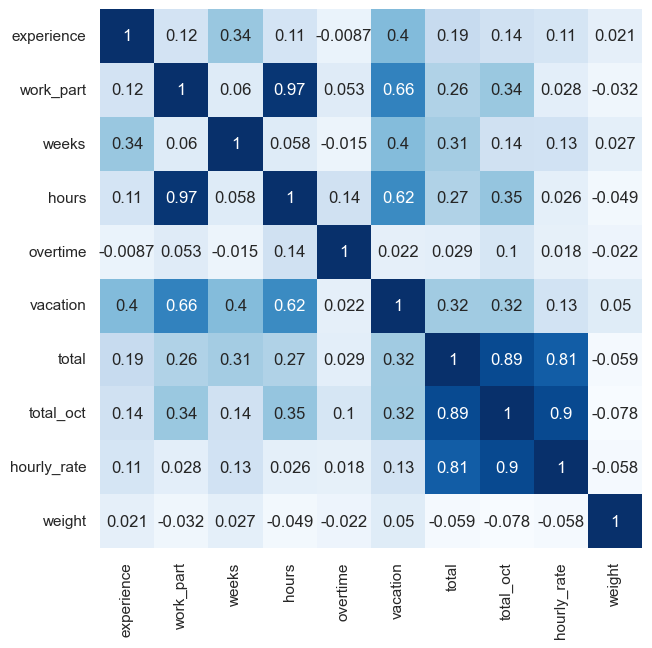

In [7]:
plt.figure(figsize = (7, 7))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='Blues', cbar=False);

Likely target label 'hourly_rate' correlates with total and total_oct, 'hourly_rate' is not significantly affected by other continious variables.

# Decision on target variable

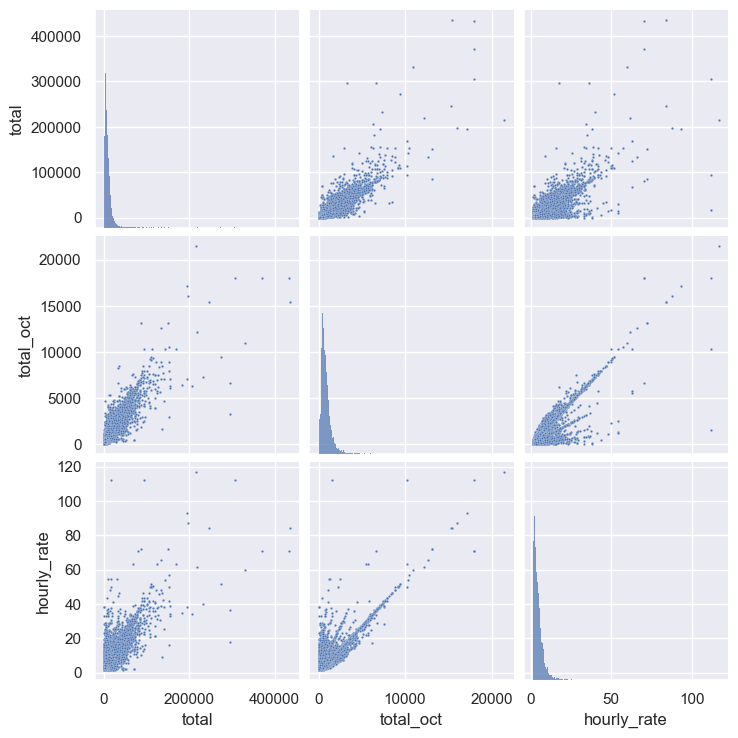

In [8]:
sns.pairplot( data, vars=['total','total_oct','hourly_rate'], plot_kws={"s": 3});

### Interaction of 'total_oct' and 'total' with other variables

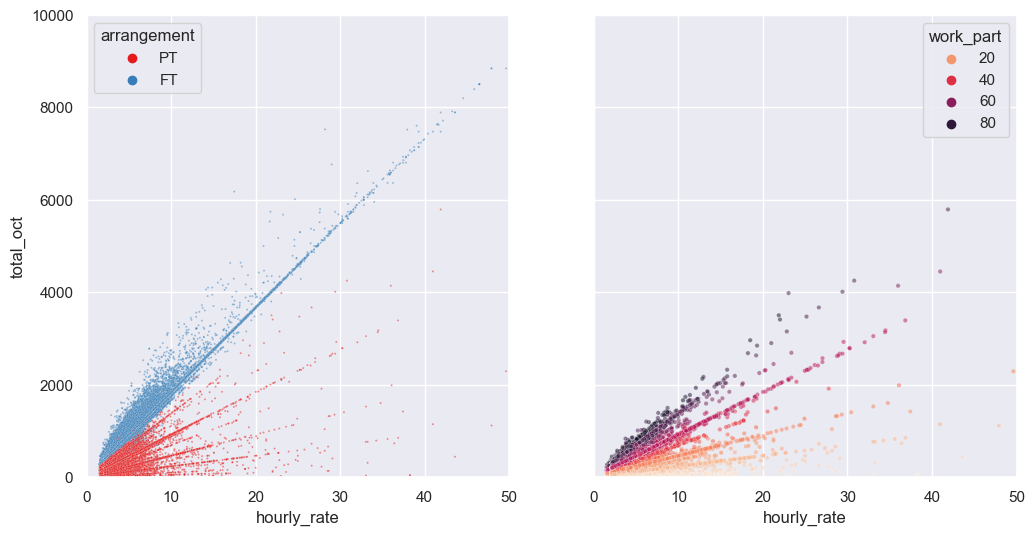

In [9]:
fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,6))
sns.scatterplot(data=data, x='hourly_rate', y='total_oct',
                 hue='arrangement', alpha=0.5, palette='Set1', s=2, ax=ax[0])

sns.scatterplot(data=data.query('arrangement == "PT"'), x='hourly_rate', y='total_oct',
                 hue='work_part', palette='rocket_r', alpha=0.5, s=10, ax=ax[1])
plt.xlim(0, 50)
plt.ylim(0, 10000);

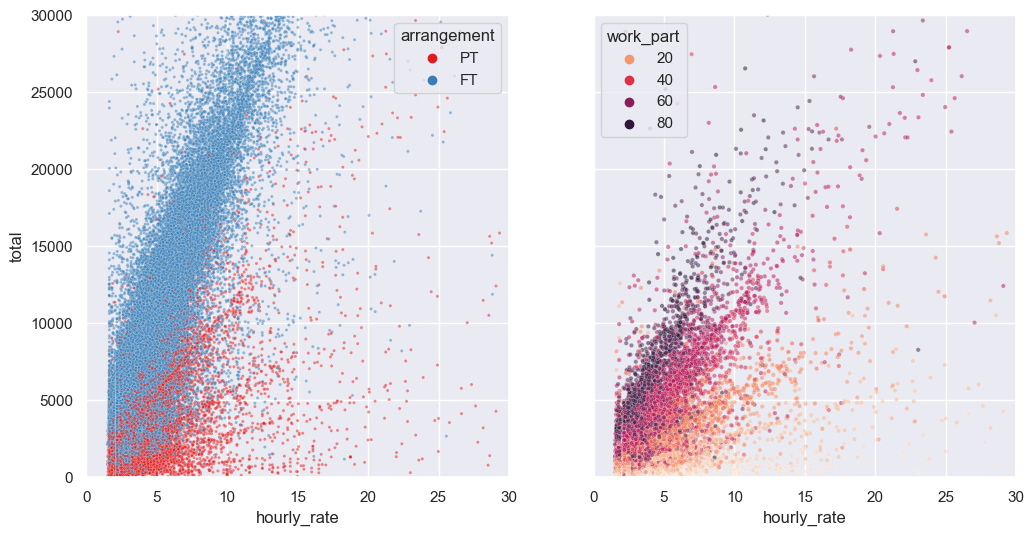

In [10]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12,6))
sns.scatterplot(data=data, x='hourly_rate', y='total',
                 hue='arrangement', alpha=0.5, palette='Set1', s=5, ax=ax[0])

sns.scatterplot(data=data.query('arrangement == "PT"'), x='hourly_rate', y='total',
                 hue='work_part', palette='rocket_r', alpha=0.5, s=10, ax=ax[1])
plt.xlim(0, 30)
plt.ylim(0, 30000);    

'total_oct' and 'total' depends on work arrangement and worked time, thus best target variable is 'hourly_reate'

## 'hourly_reate' exploration

Has distribution of hourly rate changed between 2014 and 2018 surveys?

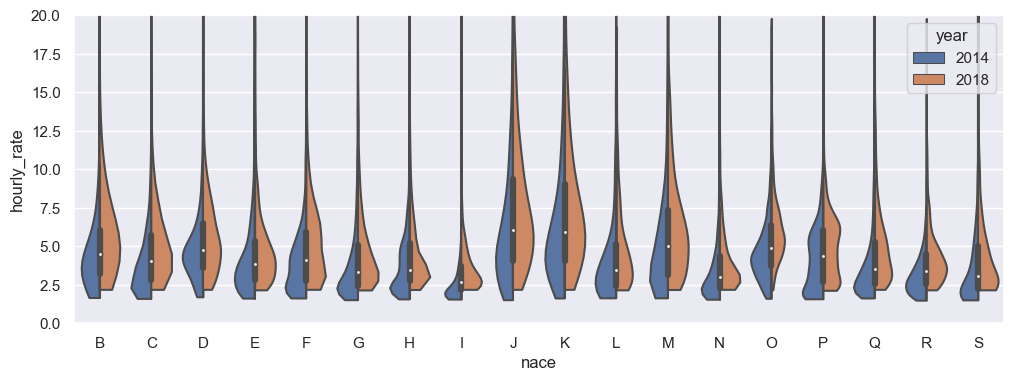

In [11]:
sns.set_theme(rc={"figure.figsize":(12, 4)})
sns.violinplot(data=data.query('arrangement == "FT"'), x='nace', y='hourly_rate', hue='year', split=True,
                    scale="count", cut=0, order=sorted(data.nace.unique()))
plt.ylim(0,20);

The change in hourly rate distribution is large, better to use only data from latest survey. 

### Is the change constant among sectors?

In [12]:
data.groupby('year').nace.value_counts().unstack()

nace,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S
year,,,,,,,,,,,,,,,,,,
2014,363,10284,1005,1172,2303,3161,3895,1225,1729,1389,865,2193,2885,3925,2431,3605,1594,928
2018,410,10277,915,1178,2136,3103,3934,1459,2045,1430,656,2435,2870,2488,2153,3139,1575,961


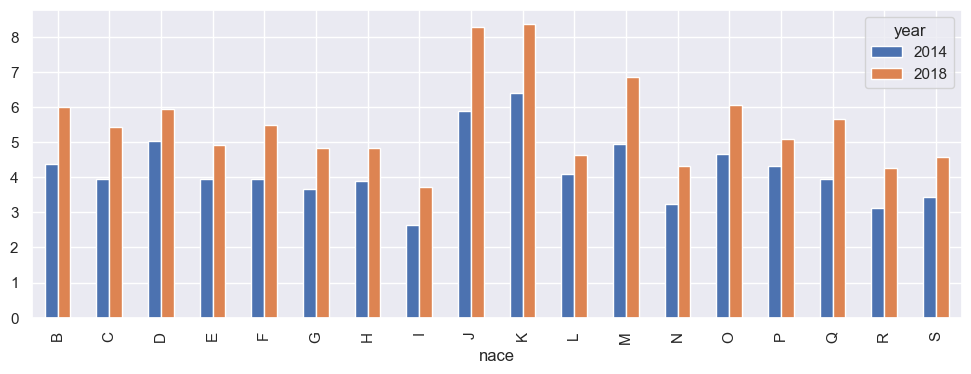

In [13]:
hr_year = data.groupby(['year', 'nace'])['hourly_rate'].mean().unstack().T
hr_year.plot(kind='bar');

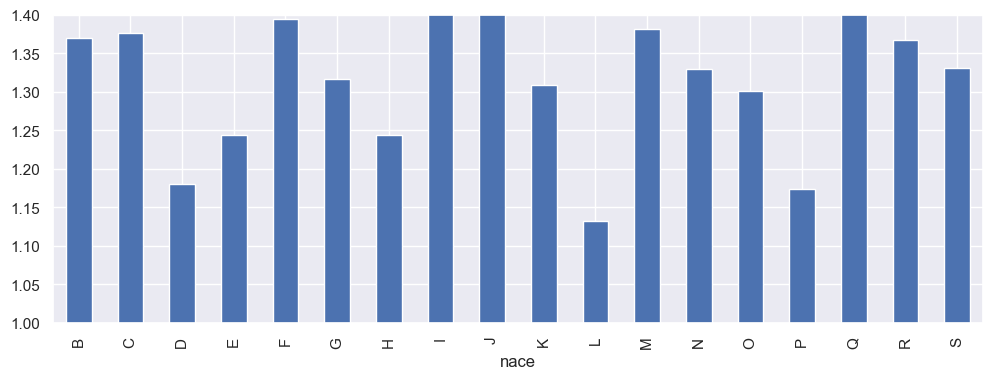

In [14]:
hr_year['ratio'] = hr_year[2018] / hr_year[2014]
hr_year['ratio'].plot(kind='bar')
plt.ylim(1,1.4);


The change varies among sectors

### Effect of work time arrangment on hourly rate (using only 2018 data)

In [15]:
data2018 = data.query('year == 2018').copy()

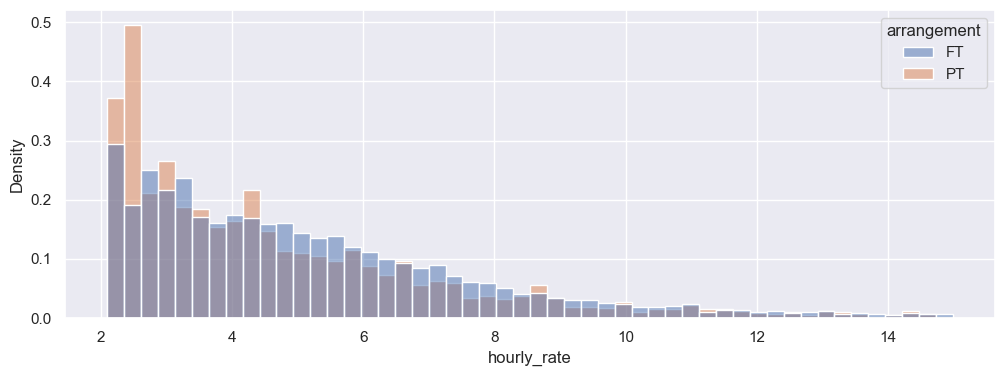

In [16]:
sns.histplot(data=data2018.query('hourly_rate < 15'), x='hourly_rate', hue='arrangement',
                                 bins=50, stat='density', common_norm=False);


In [17]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(data2018.query('arrangement == "PT"')['hourly_rate'], data2018.query('arrangement == "FT"')['hourly_rate'])
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p:.4f}")


 Mann–Whitney U Test: statistic=103845986.0000, p-value=0.0000


In [18]:
data2018['wp_group'] = pd.cut(data2018['work_part'], range(0,101,20))
data2018.groupby('wp_group')['work_part'].count()

wp_group
(0, 20]       1249
(20, 40]      1356
(40, 60]      2577
(60, 80]      1052
(80, 100]    36930
Name: work_part, dtype: int64

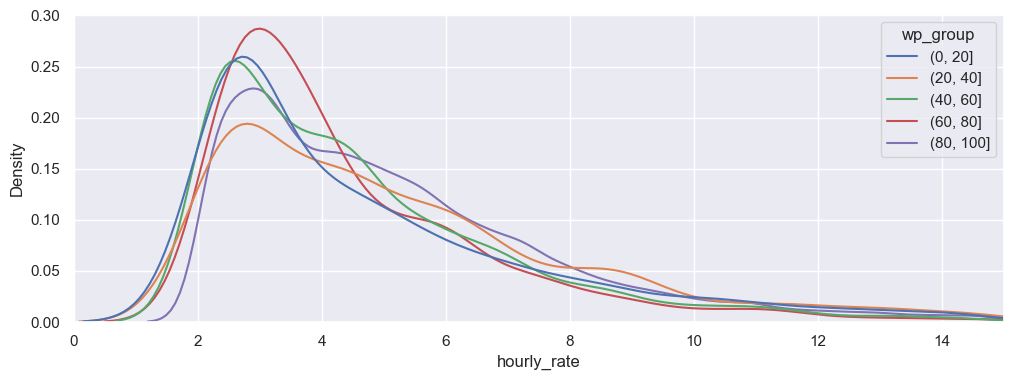

In [19]:
sns.kdeplot(data=data2018.query('hourly_rate < 15'), x='hourly_rate', hue='wp_group', common_norm=False);
plt.xlim(0,15);


In [20]:
wp_grouped = list(data2018.groupby('wp_group')['work_part'])
from scipy.stats import f_oneway
stat, p = f_oneway(wp_grouped[0][1], wp_grouped[1][1], wp_grouped[2][1], wp_grouped[3][1], wp_grouped[4][1])
print('ANOVA F=%.3f, p=%.3f' % (stat, p))

ANOVA F=1480195.261, p=0.000


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data2018['hourly_rate'],  groups=data2018['wp_group'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
 (0, 20]  (20, 40]    0.053 0.9966 -0.3544  0.4605  False
 (0, 20]  (40, 60]  -0.6908    0.0 -1.0489 -0.3326   True
 (0, 20]  (60, 80]  -0.8797    0.0 -1.3145 -0.4449   True
 (0, 20] (80, 100]  -0.0548 0.9874 -0.3537  0.2441  False
(20, 40]  (40, 60]  -0.7438    0.0 -1.0923 -0.3952   True
(20, 40]  (60, 80]  -0.9328    0.0 -1.3596 -0.5059   True
(20, 40] (80, 100]  -0.1078 0.8444 -0.3951  0.1794  False
(40, 60]  (60, 80]   -0.189 0.6559 -0.5691  0.1912  False
(40, 60] (80, 100]    0.636    0.0  0.4243  0.8476   True
(60, 80] (80, 100]   0.8249    0.0  0.5001  1.1498   True
---------------------------------------------------------


### Normality test of full time employees hourly rate

In [22]:
hr_2018_ft = data2018.query('arrangement == "FT"')['hourly_rate']

In [23]:
from scipy.stats import normaltest
stat, p = normaltest(hr_2018_ft)
print('D’Agostino K^2 statistics=%.3f, p=%.3f' % (stat, p))

D’Agostino K^2 statistics=39235.855, p=0.000


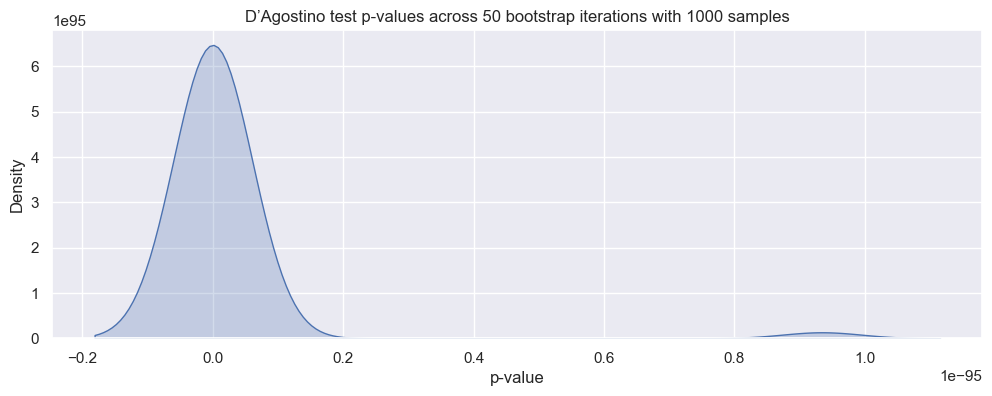

In [25]:
from sklearn.utils import shuffle
n_iterations = 50
n_samples=1000
stat = np.empty(n_iterations)
p = np.empty(n_iterations)
for i in range(n_iterations):
    stat[i], p[i] = (normaltest(shuffle(hr_2018_ft, n_samples=n_samples)))
sns.kdeplot(data=p, fill=True)
plt.title('D’Agostino test p-values across %.0f bootstrap iterations with %.0f samples' % (n_iterations, n_samples))
plt.xlabel("p-value");

# Categorical variables for 2018 and full time

In [30]:
data2018ft = data.query('arrangement == "FT" & year==2018', inplace=False )[
    ['nace', 'esize_class', 'gender', 'age_class', 'lpk',  'education', 
    'hourly_rate', 'experience', 'weeks', 'vacation'
    ]
]

In [31]:
def hr_in_categories(dataframe, column):
    """function to estimate if categorical feature is
     an important predictor and if it can be reclassified"""
    sns.boxplot(data=dataframe, x=column, y='hourly_rate')
    plt.ylim(0, 15)
    plt.show();
    tukey = pairwise_tukeyhsd(endog=dataframe['hourly_rate'], 
                        groups=dataframe[column], alpha=0.05)
    print(tukey)
    count = dataframe[column].value_counts()
    print('Value Counts:', count, sep='\n')

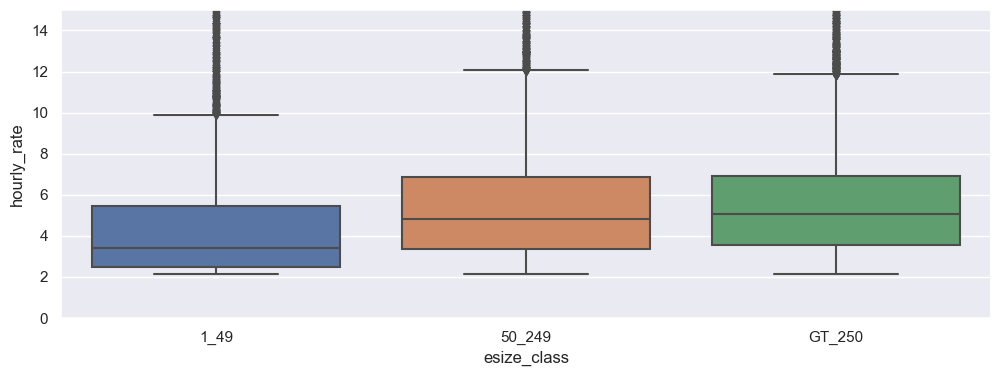

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  1_49 50_249   1.1461    0.0  1.0218 1.2703   True
  1_49 GT_250   1.1105    0.0  0.9942 1.2268   True
50_249 GT_250  -0.0356 0.7244 -0.1445 0.0734  False
---------------------------------------------------
Value Counts:
GT_250    15966
50_249    11525
1_49       9294
Name: esize_class, dtype: int64


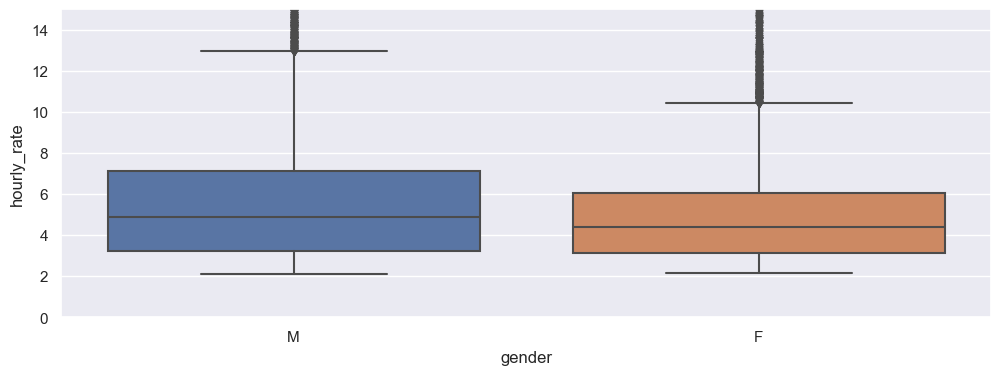

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     F      M   0.8066   0.0 0.7283 0.8848   True
-------------------------------------------------
Value Counts:
M    19974
F    16811
Name: gender, dtype: int64


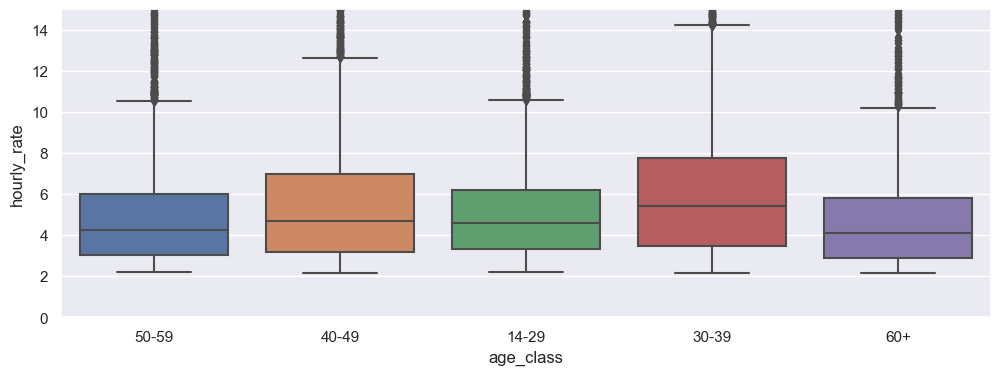

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 14-29  30-39   1.2492    0.0  1.0861  1.4124   True
 14-29  40-49   0.6221    0.0  0.4595  0.7848   True
 14-29  50-59  -0.0887 0.5594 -0.2494  0.0721  False
 14-29    60+  -0.1999 0.0558 -0.4028   0.003  False
 30-39  40-49  -0.6271    0.0 -0.7893 -0.4649   True
 30-39  50-59  -1.3379    0.0 -1.4981 -1.1777   True
 30-39    60+  -1.4492    0.0 -1.6517 -1.2466   True
 40-49  50-59  -0.7108    0.0 -0.8706  -0.551   True
 40-49    60+  -0.8221    0.0 -1.0242 -0.6199   True
 50-59    60+  -0.1113 0.5539 -0.3118  0.0893  False
----------------------------------------------------
Value Counts:
50-59    8614
40-49    8199
30-39    8108
14-29    8006
60+      3858
Name: age_class, dtype: int64


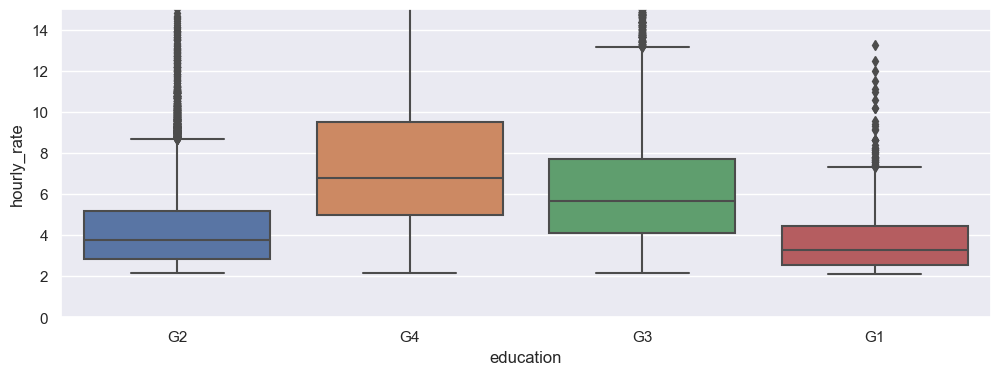

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    G1     G2   0.5137   0.0 0.2433 0.7841   True
    G1     G3   2.7877   0.0 2.5094 3.0659   True
    G1     G4   4.3739   0.0 4.0892 4.6587   True
    G2     G3   2.2739   0.0 2.1614 2.3864   True
    G2     G4   3.8602   0.0 3.7325 3.9879   True
    G3     G4   1.5863   0.0 1.4427 1.7298   True
-------------------------------------------------
Value Counts:
G2    19371
G3     9559
G4     6680
G1     1175
Name: education, dtype: int64


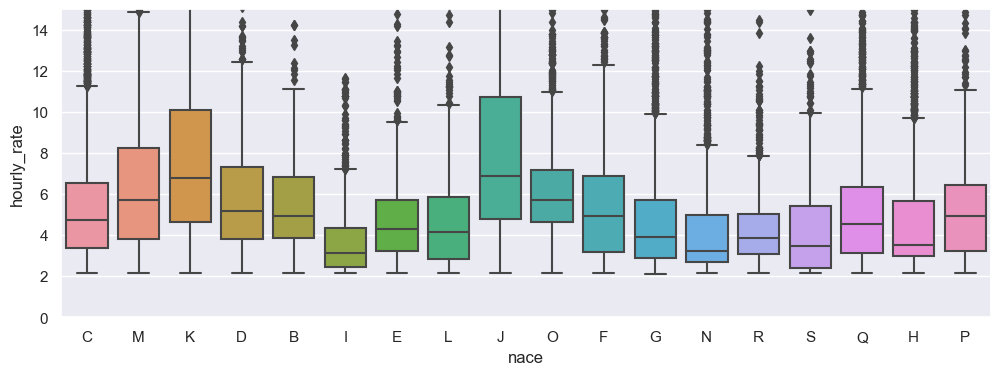

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     B      C  -0.5978 0.1723 -1.2794  0.0838  False
     B      D  -0.0195    1.0 -0.8301  0.7911  False
     B      E  -1.1563    0.0 -1.9294 -0.3832   True
     B      F  -0.4738 0.7086 -1.2035  0.2559  False
     B      G  -1.1443    0.0 -1.8573 -0.4313   True
     B      H  -1.1689    0.0 -1.8705 -0.4673   True
     B      I  -2.2757    0.0 -3.0526 -1.4987   True
     B      J   2.5323    0.0  1.7981  3.2665   True
     B      K    2.419    0.0  1.6608  3.1772   True
     B      L  -1.1456 0.0013 -2.0475 -0.2438   True
     B      M   0.8912 0.0027   0.162  1.6203   True
     B      N   -1.662    0.0 -2.3826 -0.9413   True
     B      O    0.118    1.0 -0.6011  0.8371  False
     B      P  -0.9081 0.0037  -1.664 -0.1523   True
     B      Q  -0.7209 0.0483 -1.4397 -0.0022   True
     B      R  -1.6703    0.0  -2.444 -0.8966 

In [34]:
for variable in ['esize_class', 'gender', 'age_class', 'education','nace']:
    hr_in_categories(data2018ft, variable)

Different levels of Lithuanian Classification of Occupations (lpk)

In [35]:
data2018ft['lpk1'] = data2018ft['lpk'] // 100
data2018ft['lpk2'] = data2018ft['lpk'] // 10
data2018ft.value_counts('lpk1')

lpk1
2    9220
7    5817
8    5807
3    4363
1    3486
5    3296
9    2902
4    1622
0     263
6       9
dtype: int64

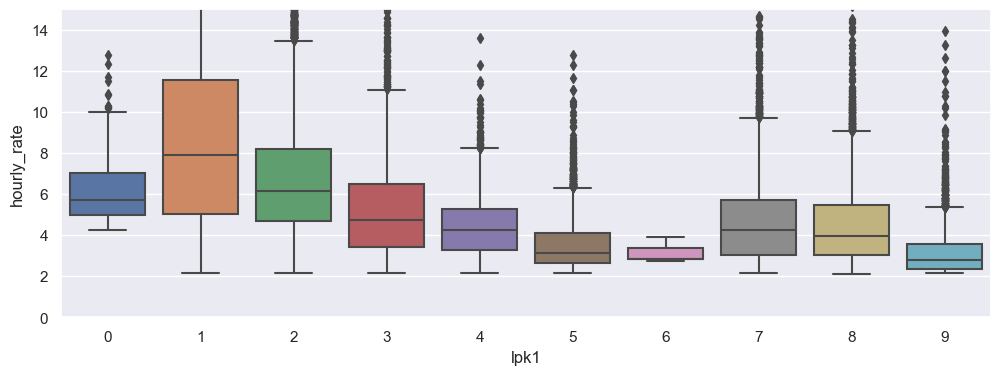

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.4329    0.0   2.7481  4.1178   True
     0      2   0.7759 0.0093   0.1062  1.4457   True
     0      3   -0.944 0.0005   -1.624  -0.264   True
     0      4   -1.731    0.0  -2.4429  -1.019   True
     0      5  -2.6345    0.0  -3.3208 -1.9483   True
     0      6  -3.0919 0.1757  -6.7225  0.5387  False
     0      7  -1.5342    0.0  -2.2094  -0.859   True
     0      8  -1.6952    0.0  -2.3704   -1.02   True
     0      9  -3.0173    0.0  -3.7069 -2.3276   True
     1      2   -2.657    0.0    -2.87 -2.4441   True
     1      3  -4.3769    0.0  -4.6202 -4.1336   True
     1      4  -5.1639    0.0  -5.4858  -4.842   True
     1      5  -6.0675    0.0  -6.3277 -5.8073   True
     1      6  -6.5248    0.0 -10.0995 -2.9502   True
     1      7  -4.9671    0.0  -5.1965 -4.7377   True
     1      8  -5.1282    0.

In [36]:
hr_in_categories(data2018ft, 'lpk1')

 Remove classes with small mumber of cases: lpk1 == 6 "Qualified agricultural, forestry and fisheries workers" and lpk1 == 0 "Professions of the armed forces".
Classes lpk1 4 (Clerical support workers), 7 (Craft and related trades workers) and 8 (Plant and machine operators, and assemblers) can be joined to one group.

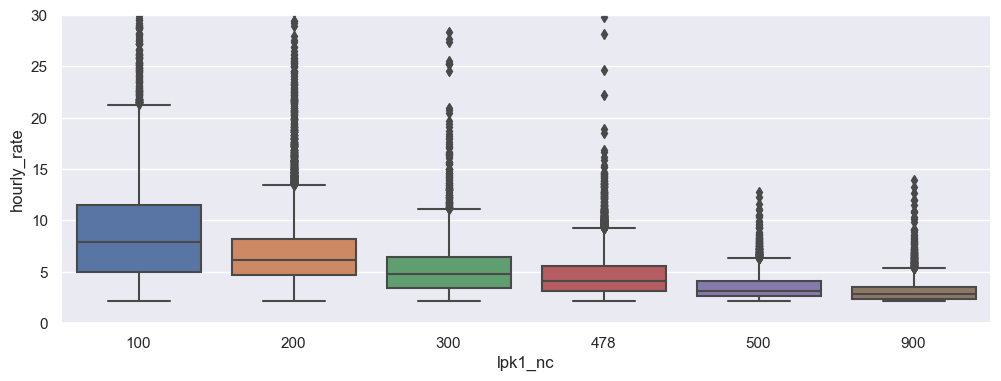

In [37]:
data2018ft.drop(data2018ft[(data2018ft.lpk1 == 6) | (data2018ft.lpk1 == 0) ].index, inplace=True)
reclassify = { 1: 100, 2: 200, 3: 300, 4: 478, 5: 500, 7: 478, 8: 478, 9: 900}
data2018ft['lpk1_nc']=data2018ft['lpk1'].map(reclassify)
sns.boxplot(data=data2018ft, x='lpk1_nc', y='hourly_rate')
plt.ylim(0, 30);

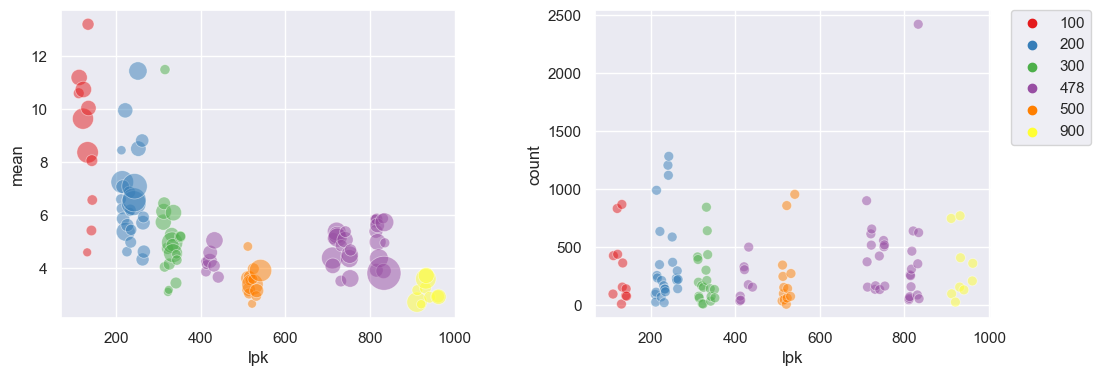

In [39]:
lpk_agg = data2018ft.groupby(['lpk1_nc', 'lpk2', 'lpk'])['hourly_rate'].agg(
    ['mean', 'count', 'std']).reset_index()

f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 0.35)
sns.scatterplot(ax=axes[0], data=lpk_agg, x='lpk', y='mean', hue='lpk1_nc',
                 size='count',sizes=(40, 600), alpha=0.5, palette='Set1', legend=False)
sns.scatterplot(ax=axes[1], data=lpk_agg, x='lpk', y='count', hue='lpk1_nc', 
                s=50, alpha=0.5,palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);

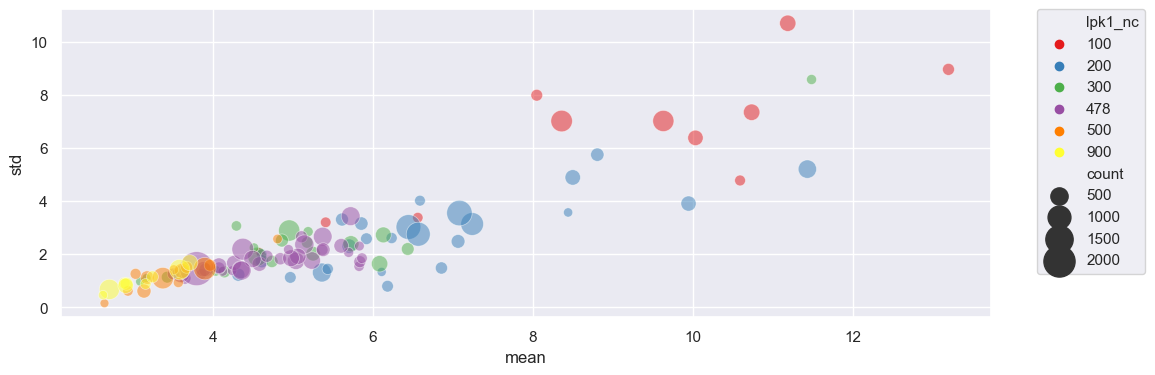

In [40]:
sns.scatterplot(data=lpk_agg, x='mean', y='std', hue='lpk1_nc',
                 size='count',sizes=(40, 600), alpha=0.5, palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0);

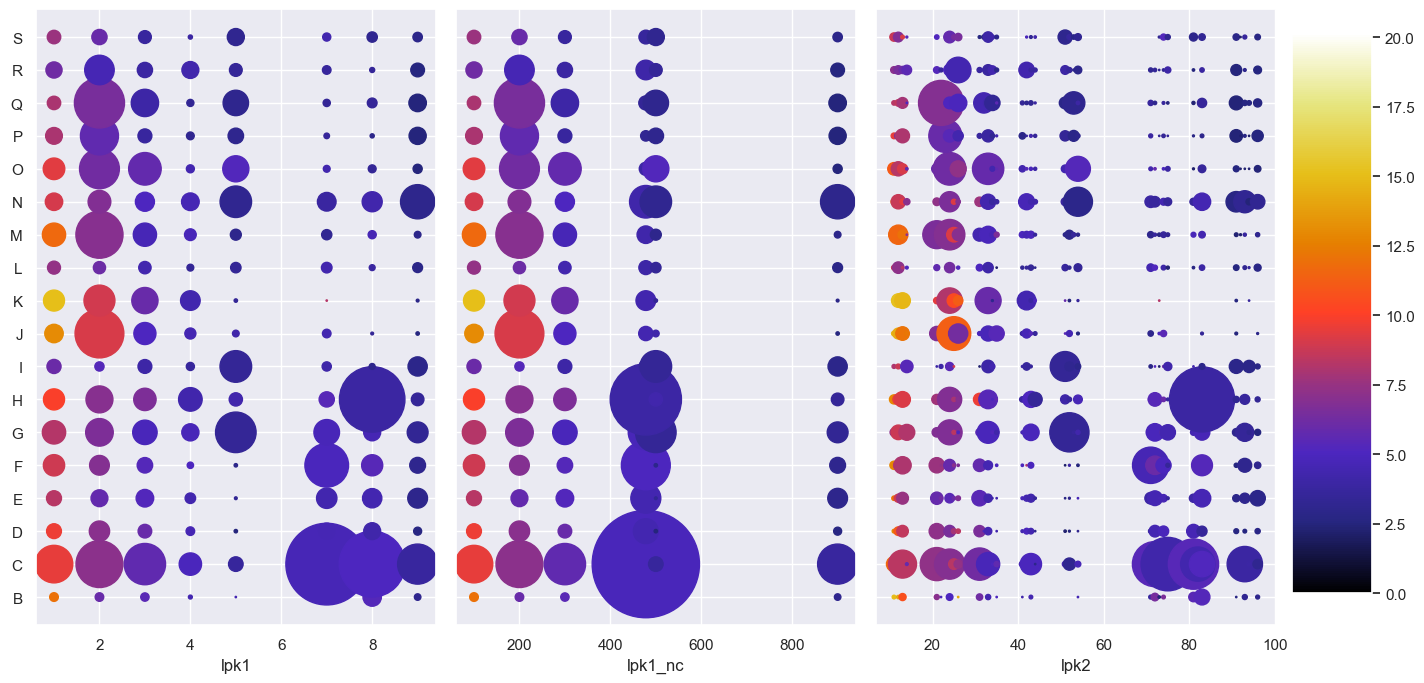

In [43]:
lpk1_nace_agg = data2018ft.groupby(['nace','lpk1'])['hourly_rate'].agg(
    ['mean', 'count']).reset_index()
lpk1_nc_nace_agg = data2018ft.groupby(['nace','lpk1_nc'])['hourly_rate'].agg(
    ['mean', 'count']).reset_index()
lpk2_nace_agg = data2018ft.groupby(['nace','lpk2'])['hourly_rate'].agg(
    ['mean', 'count']).reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,8))
plt.subplots_adjust(wspace = 0.05)
norm=plt.Normalize(0, max(lpk2_nace_agg['mean']))
sc = ax1.scatter(data=lpk1_nace_agg, x='lpk1', y='nace', c='mean', s='count',cmap='CMRmap', norm=norm)
ax1.set_xlabel('lpk1')

ax2.scatter(data=lpk1_nc_nace_agg, x='lpk1_nc', y='nace', c='mean', s='count',cmap='CMRmap', norm=norm);
ax2.set_xlabel('lpk1_nc')

ax3.scatter(data=lpk2_nace_agg, x='lpk2', y='nace', c='mean', s='count',cmap='CMRmap', norm=norm);
ax3.set_xlabel('lpk2')

cbar_ax = f.add_axes([0.91, 0.15, 0.05, 0.7])
f.colorbar(sc, cax=cbar_ax);


In [45]:
hr_mean = data2018ft['hourly_rate'].mean().round(2)
hr_mean

5.53

Percentage of economy sectors (nace) above mean hr for first level (lpk1) of profession classification.

In [47]:
lpk1_nc_nace_agg.query(f'count>5 & mean>{hr_mean}').sort_values(
    'lpk1_nc').value_counts('lpk1_nc')/len(lpk1_nc_nace_agg['nace'].unique())*100

lpk1_nc
100    100.000000
200     88.888889
300     27.777778
dtype: float64

 In general, profession is more important than employment sector. Hr is highest in lpk1=1 (Managers) and  lpk1=2 (Professionals) profession class and lowest in lpk1=5 (Service and sales workers) and lpk1=9 (Elementary occupations). For the same profession hr tends to be higher in nace=K (Financial and insurance activities), nace=J (Information and communications) and nace=M (Professional, scientific and technical activities) sectors. 